### @Collector and Speaker : little snow
### @Owner : 考研数学计算机之路 2024-2025 LLM微调实战项目

In [1]:
import torch

## 利用RNN 训练**hello** 转换到 **ohlol**

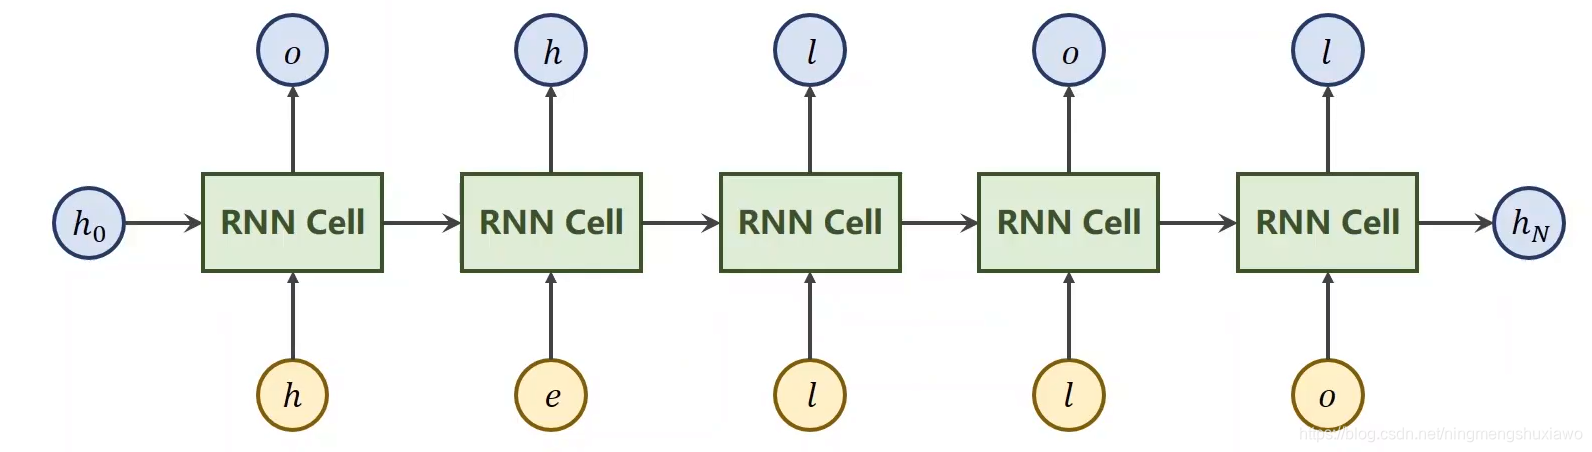

In [2]:
# 绘图
from IPython import display
display.Image(filename="picture/hello_1.png", width=600)

In [3]:
input_size = 4  # 输入特征的维度（字符种类就4种，h\e\l\o）
hidden_size = 4  # 隐藏层的维度
batch_size = 1  # 每个批次的样本数量
num_layers=1  # RNN的层数为1
seq_len=5     # hello的字符序列长度为5

### 把字符串hello中的每个字符转成one-hot向量, inputsize=4(输入有4个字符（e h l o）)

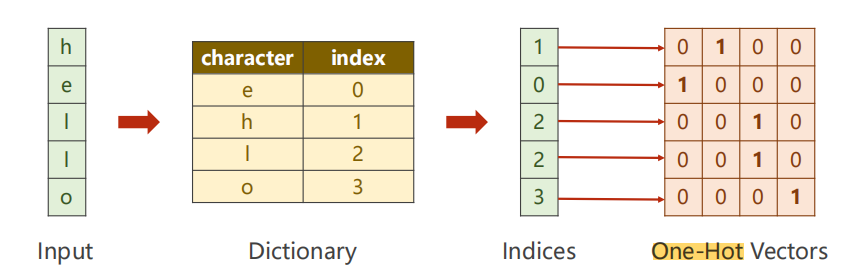

In [4]:
display.Image(filename="picture/字符转为one_hot.png", width=800)

In [5]:
idx2char=['e','h','l','o']  # 字符到索引的映射
x_data=[1,0,2,2,3]  # 输入数据，表示字符串"hello"的索引
y_data=[3,1,2,3,2]  # 标签数据，表示字符串"ohlol"的索引
 
# one-hot编码查找表，分别对应索引0,1,2,3
one_hot_lookup=[[1,0,0,0],
                [0,1,0,0],
                [0,0,1,0],
                [0,0,0,1]] 

# 将输入数据转换为one-hot编码的序列张量
x_one_hot=[one_hot_lookup[x] for x in x_data]  
print('x_one_hot:',x_one_hot)
 
# 构造输入序列和标签
inputs=torch.Tensor(x_one_hot).view(seq_len,batch_size,input_size)  # 输入张量的形状为(seq_len, batch_size, input_size)
labels=torch.LongTensor(y_data)  # 标签张量，维度是: (seqLen * batch_size ，1)

x_one_hot: [[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1]]


### 这相当于一个多分类问题，输出就是一个4维的向量，每一维代表是某一个字符的概率，接交叉熵就能输出预测的概率分布（每个字符可能是 真正结果 的可能性），注意此处yt就是真值，即真正结果。

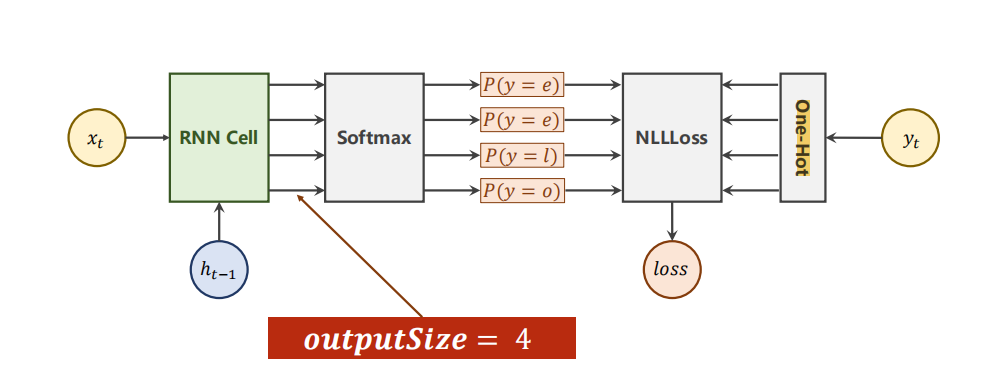

In [6]:
display.Image(filename="picture/hello输出后的softmax.png", width=800)

### 模型建模

In [7]:
# 定义一个模型类，继承自torch.nn.Module
class Model(torch.nn.Module):
    def __init__(self,input_size,hidden_size,batch_size,num_layers=1):
        super(Model, self).__init__()  # 调用父类的构造函数
        self.num_layers=num_layers  # 设置RNN的层数
        self.batch_size=batch_size  # 设置每个批次的样本数量
        self.input_size=input_size  # 设置输入的特征维度
        self.hidden_size=hidden_size  # 设置隐藏层的特征维度
        # 初始化RNN层
        self.rnn=torch.nn.RNN(input_size=self.input_size,
                              hidden_size=self.hidden_size,
                              num_layers=self.num_layers)
 
    def forward(self,input):
        # 初始化隐藏状态为零
        hidden=torch.zeros(self.num_layers,self.batch_size,self.hidden_size)
        # 前向传播，获取RNN的输出
        out, _=self.rnn(input,hidden)
        # 为了能和labels做交叉熵，需要reshape一下:(seqlen*batchsize, hidden_size),即二维向量，变成一个矩阵
        return out.view(-1,self.hidden_size)
 
# 实例化模型
net=Model(input_size,hidden_size,batch_size,num_layers)
net

Model(
  (rnn): RNN(4, 4)
)

### 定义损失函数和优化器

In [8]:
# 定义损失函数为交叉熵损失
criterion = torch.nn.CrossEntropyLoss()
# 定义优化器为Adam，学习率设置为0.05
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)

### 开始训练

In [9]:
# 进行20个epoch的训练
for epoch in range(20):
    # 清空梯度
    optimizer.zero_grad()
    # inputs维度是: (seqLen, batch_size, input_size) 
    # labels维度是: (seqLen * batch_size * 1)
    # outputs维度是: (seqLen, batch_size, hidden_size)
    outputs = net(inputs)  # 前向传播，获取模型输出
    loss = criterion(outputs, labels)  # 计算损失
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 更新模型参数
 
    # 获取预测结果
    _, idx = outputs.max(dim=1)  # 找到每个时间步的最大输出
    idx = idx.data.numpy()  # 将结果转换为numpy数组
    # 打印预测结果和当前epoch的损失
    print('Predicted: ', ''.join([idx2char[x] for x in idx]), end='')
    print(', Epoch [%d/20] loss=%.3f' % (epoch + 1, loss.item()))  # 输出当前epoch的损失

Predicted:  eeeoe, Epoch [1/20] loss=1.615
Predicted:  eeooe, Epoch [2/20] loss=1.465
Predicted:  eeooo, Epoch [3/20] loss=1.334
Predicted:  oeool, Epoch [4/20] loss=1.225
Predicted:  olool, Epoch [5/20] loss=1.126
Predicted:  olool, Epoch [6/20] loss=1.037
Predicted:  olool, Epoch [7/20] loss=0.963
Predicted:  olool, Epoch [8/20] loss=0.905
Predicted:  oholl, Epoch [9/20] loss=0.860
Predicted:  oholl, Epoch [10/20] loss=0.825
Predicted:  oholl, Epoch [11/20] loss=0.797
Predicted:  oholl, Epoch [12/20] loss=0.773
Predicted:  oholl, Epoch [13/20] loss=0.753
Predicted:  oholl, Epoch [14/20] loss=0.734
Predicted:  oholl, Epoch [15/20] loss=0.716
Predicted:  oholl, Epoch [16/20] loss=0.700
Predicted:  oholl, Epoch [17/20] loss=0.685
Predicted:  oholl, Epoch [18/20] loss=0.670
Predicted:  oholl, Epoch [19/20] loss=0.657
Predicted:  oholl, Epoch [20/20] loss=0.644


### 使用torch.nn.Embedding-一种低维度的、稠密的、可学习数据的编码方式。

### 原因：
        独热编码（One-Hot）向量维度过高；
        独热编码（One-Hot）向量稀疏，每个向量是一个为1其余为0；
        独热编码（One-Hot）是硬编码，编码情况与数据特征无关；

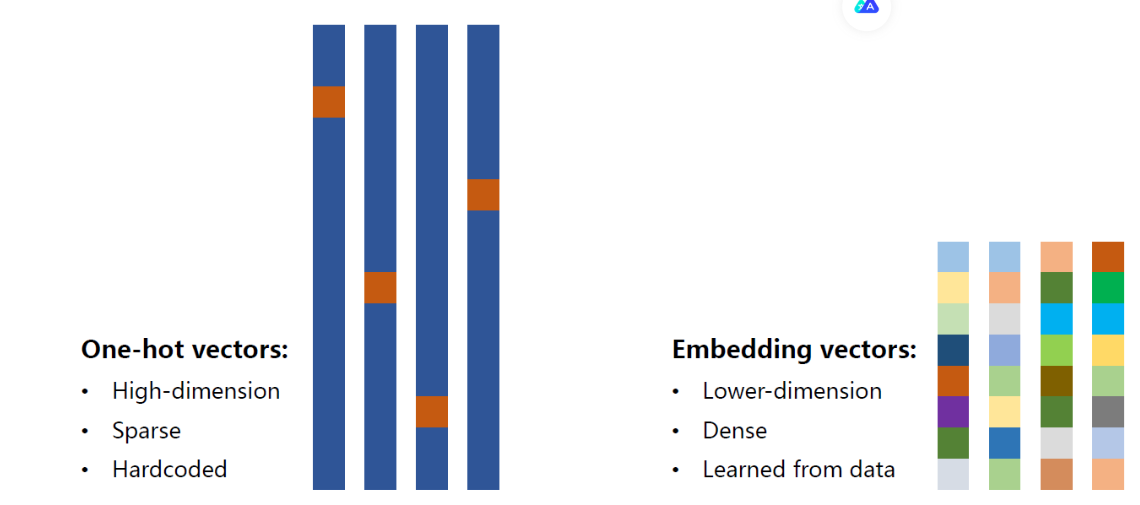

In [10]:
display.Image(filename="picture/Onrhot_vs_Embedding.png", width=800)


### Embedding可以把一个高维的稀疏的样本映射到一个稠密的低维的空间里面，做输入数据的降维

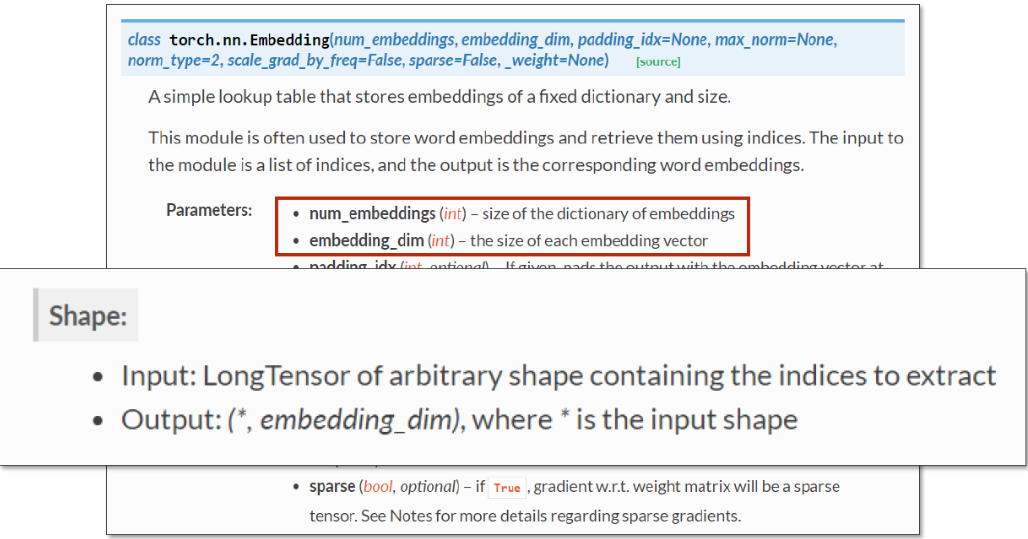

In [11]:
display.Image(filename="picture/nn.Embedding.png", width=800)

### 输入层必须是长整型张量，输出是（input shape,embedding_shape）

### 字符串不用再预先处理为One-Hot向量，而是在建模时直接初始化（类的init函数）
### 代码新增了 
#### ```嵌入层：self.emb = torch.nn.Embedding(input_size, embedding_size)```
#### ```全连接层: self.fc = torch.nn.Linear(hidden_size, num_class)```

In [12]:
input_size = 4  # 输入特征的大小
num_class = 4  # 类别数量
hidden_size = 8  # 隐藏层大小
embedding_size = 10  # 嵌入层大小
batch_size = 1  # 批次大小
num_layers = 2  # RNN层数
seq_len = 5  # 序列长度
 
idx2char_1 = ['e', 'h', 'l', 'o']  # 字符到索引的映射
idx2char_2 = ['h', 'l', 'o']  # 另一个字符到索引的映射
 
x_data = [[1, 0, 2, 2, 3]]  # 输入数据
y_data = [3, 1, 2, 2, 3]  # 标签数据
 
# inputs 维度为（batchsize，seqLen）
inputs = torch.LongTensor(x_data)  # 转换为长整型张量
# labels 维度为（batchsize*seqLen）
labels = torch.LongTensor(y_data)  # 转换为长整型张量


class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # 嵌入层，输入大小和嵌入大小
        self.emb = torch.nn.Embedding(input_size, embedding_size)
 
        # RNN层，输入为嵌入大小，输出为隐藏层大小
        self.rnn = torch.nn.RNN(input_size=embedding_size,
                                hidden_size=hidden_size,
                                num_layers=num_layers,
                                batch_first=True)
        # 全连接层，从隐藏层大小到类别数量
        self.fc = torch.nn.Linear(hidden_size, num_class) 
 
    def forward(self, x):
        hidden = torch.zeros(num_layers, x.size(0), hidden_size)  # 初始化隐藏状态
        x = self.emb(x)  # 嵌入处理
        x, _ = self.rnn(x, hidden)  # RNN前向传播
        x = self.fc(x)  # 全连接层
        return x.view(-1, num_class)  # 变换为（batchsize * seqlen,numclass）


net = Model()  # 实例化模型
net  # 输出模型结构

Model(
  (emb): Embedding(4, 10)
  (rnn): RNN(10, 8, num_layers=2, batch_first=True)
  (fc): Linear(in_features=8, out_features=4, bias=True)
)

### 训练部分是一样的

In [13]:
# 定义损失函数为交叉熵损失
criterion = torch.nn.CrossEntropyLoss()
# 定义优化器为Adam，学习率为0.05
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
 
# 进行15个epoch的训练
for epoch in range(15):
    # 清空梯度
    optimizer.zero_grad()
    # 前向传播，获取输出
    outputs = net(inputs)
 
    # 计算损失
    loss = criterion(outputs, labels)
    # 反向传播
    loss.backward()
    # 更新参数
    optimizer.step()
 
    # 获取预测结果的索引
    _, idx = outputs.max(dim=1)
    idx = idx.data.numpy()
    # 打印预测的字符串和当前epoch的损失
    print('Predicted string: ', ''.join([idx2char_1[x] for x in idx]), end='')
    print(", Epoch [%d/15] loss = %.3f" % (epoch + 1, loss.item()))

Predicted string:  ehhhl, Epoch [1/15] loss = 1.414
Predicted string:  lllll, Epoch [2/15] loss = 1.149
Predicted string:  lllll, Epoch [3/15] loss = 1.061
Predicted string:  olllo, Epoch [4/15] loss = 0.960
Predicted string:  oollo, Epoch [5/15] loss = 0.799
Predicted string:  oollo, Epoch [6/15] loss = 0.616
Predicted string:  ohllo, Epoch [7/15] loss = 0.455
Predicted string:  ohllo, Epoch [8/15] loss = 0.333
Predicted string:  ohllo, Epoch [9/15] loss = 0.241
Predicted string:  ohllo, Epoch [10/15] loss = 0.170
Predicted string:  ohllo, Epoch [11/15] loss = 0.117
Predicted string:  ohllo, Epoch [12/15] loss = 0.081
Predicted string:  ohllo, Epoch [13/15] loss = 0.058
Predicted string:  ohllo, Epoch [14/15] loss = 0.043
Predicted string:  ohllo, Epoch [15/15] loss = 0.032
